In [7]:
import numpy as np
import pandas as pd


gathering the data

In [8]:
df = pd.read_csv('/content/placement.csv');

In [9]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [10]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


these all the steps to be covered to make the ml project.

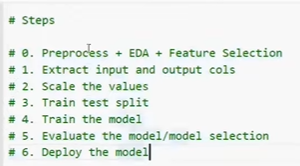

In [11]:
df.shape


(100, 4)

step of preprocessing data

In [12]:
df=df.iloc[ : , 1:]

In [13]:
df


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


EDA process

In [15]:
import matplotlib.pyplot as plt


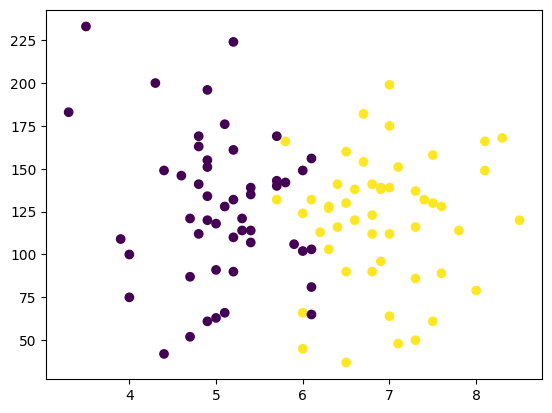

In [16]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

as by we can understand that our data and the problem is a linear problem linear regression can be used  

### separating the input and output columns






In [17]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [22]:
X_train

,cgpa,iq
2,5.3,121.0
85,5.8,166.0
94,4.7,52.0
74,6.7,154.0
55,7.8,114.0
...,...,...
65,8.1,166.0
57,6.5,130.0
75,4.8,169.0
13,6.4,116.0


In [23]:
X_test

,cgpa,iq
76,4.9,155.0
66,6.9,96.0
67,5.0,118.0
6,5.7,143.0
16,5.2,224.0
70,6.3,127.0
0,6.8,123.0
58,8.0,79.0
92,5.2,110.0
68,4.0,75.0


In [24]:
Y_test

,placement
76,0
66,1
67,0
6,0
16,0
70,1
0,1
58,1
92,0
68,0


In [25]:
Y_train

,placement
2,0
85,1
94,0
74,1
55,1
...,...
65,1
57,1
75,0
13,1


###Scaling the input values (ranges btw -1,1 )

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_train

array([[-0.626385  , -0.06115909],
       [-0.18664514,  1.07505338],
       [-1.15407282, -1.80335155],
       [ 0.6048866 ,  0.77206339],
       [ 1.57231429, -0.23790325],
       [-1.06612485, -0.28840159],
       [ 0.86873052, -1.50036156],
       [ 1.30847037,  0.1660834 ],
       [-0.27459311,  0.21658174],
       [ 0.69283457,  0.44382423],
       [-0.0107492 , -0.54089325],
       [-0.89022891, -0.81863407],
       [ 1.39641835,  0.11558507],
       [ 0.95667849, -1.90434822],
       [ 0.86873052, -0.28840159],
       [ 0.42899066, -2.18208904],
       [-1.41791674, -2.05584321],
       [ 0.07719877, -1.47511239],
       [ 0.6048866 ,  1.47904004],
       [ 0.42899066,  0.92355839],
       [ 1.13257443, -1.85384988],
       [ 0.69283457, -0.84388324],
       [ 0.07719877, -0.51564408],
       [-1.15407282, -0.91963074],
       [-2.20944848,  2.76674751],
       [-0.53843702, -0.41464742],
       [-0.71433297,  0.21658174],
       [ 1.13257443, -0.18740492],
       [-2.38534442,

In [31]:
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[-0.97817688,  0.79731256],
       [ 0.78078255, -0.69238824],
       [-0.89022891, -0.13690659],
       [-0.27459311,  0.49432256],
       [-0.71433297,  2.53950502],
       [ 0.25309472,  0.09033591],
       [ 0.69283457, -0.01066076],
       [ 1.74821023, -1.12162407],
       [-0.71433297, -0.33889992],
       [-1.76970862, -1.22262073]])

###training the modal

as in EDA we evaluated that the modal is been linear modal and we can classify the results using the linear modal thats why we choose logisticRegression which is a linear modal

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

# modal getting training

In [36]:
clf.fit(X_train, Y_train)

LogisticRegression()

##testing modal by prediciting the values based on test data this is the result of the modal which we acquired my the modal now work is to evalute modal by comparing the modal result to the original result which we have stored in Y_test

In [41]:
Y_pred = clf.predict(X_test)

In [43]:
Y_pred

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [44]:
Y_test

,placement
76,0
66,1
67,0
6,0
16,0
70,1
0,1
58,1
92,0
68,0


we can evalute the modal result with acctual modal using the accuracy score

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_test,Y_pred)

1.0

# we got accurracy of 100% as our modal correctly identified all the data and results correctly

# Booyah!!

### we can also see how does the modal understands the data and make distinguish btw the data

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

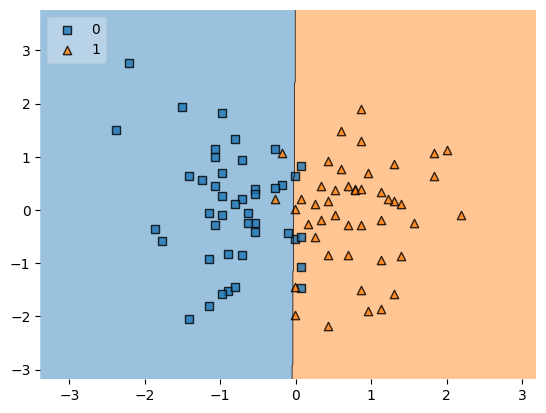

In [49]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

# as our modal is now ready we got the desired results also now we can deploy it to the websites fior that we need to firstly pick this modal from here using a pickle module

pickle picks the object clf to a file and we can deploy the file to any environment

In [50]:
import pickle

In [51]:
pickle.dump(clf, open('model.pkl','wb'))

# And here we done this modle.pkl file is the one which we deploy to any environment we will learn about in later stages

In [52]:
# Great Success